In [73]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time

In [47]:
knots = np.array([0]*2 + list(np.arange(0,10)) + [10]*3)
knots

array([ 0,  0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 10])

In [49]:
splines = []
for i in range(0,13):
    coeffs = np.zeros(13)
    coeffs[i] = 1.0
    spline = scipy.interpolate.BSpline(knots,coeffs, 3)
    splines.append(spline)

In [75]:
coeffs = np.zeros(13)
bins = np.zeros(11)
n = 0
def score_data(x):
    global coeffs, bins, n
    n += 1
    bins[int(np.floor(x))] += 1
    for i,spline in enumerate(splines):
        inner_product = 1.0 * scipy.interpolate.splev(x, spline)
        if inner_product> 0:
            coeffs[i] += inner_product

In [76]:
def plot(coeffs, bins, n):
    plt.gca()
    plt.bar(np.arange(0,11),bins/n)
    spline = scipy.interpolate.BSpline(knots, coeffs/n, 3)
    x = np.linspace(0,10,100)
    y = scipy.interpolate.splev(x, spline)
    plt.plot(x,y,"k-")
    plt.title(f"n={n}")
    plt.show()

/tmp/ipykernel_5002/437975591.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bins[int(np.floor(x))] += 1
/tmp/ipykernel_5002/437975591.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coeffs[i] += inner_product


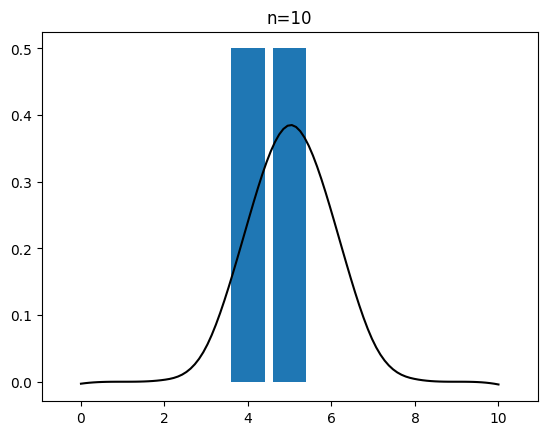

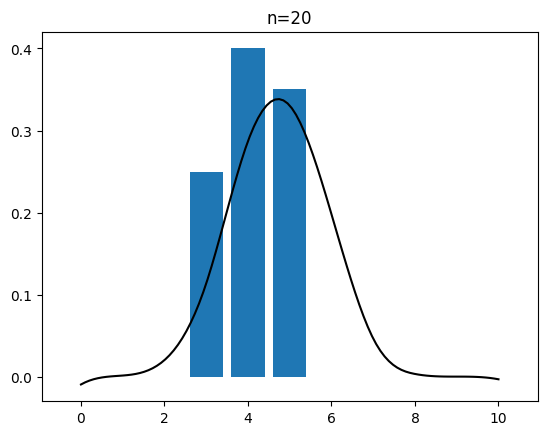

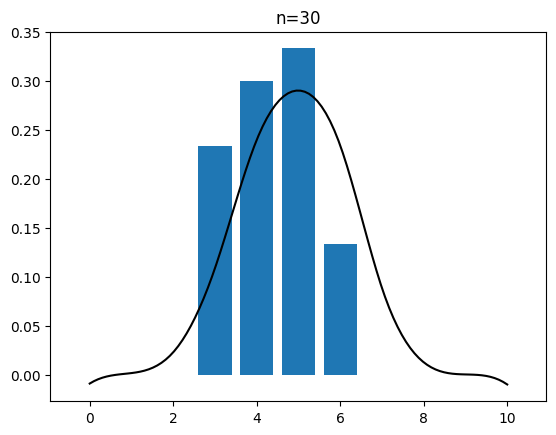

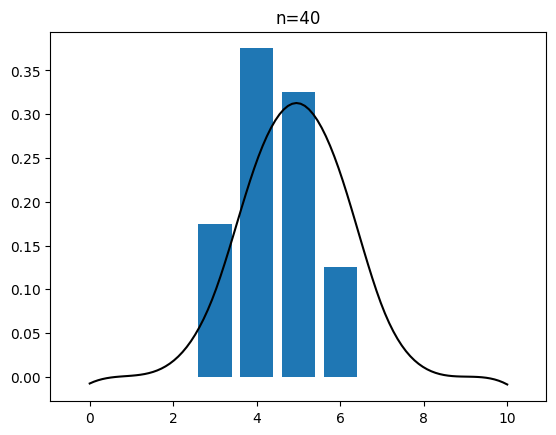

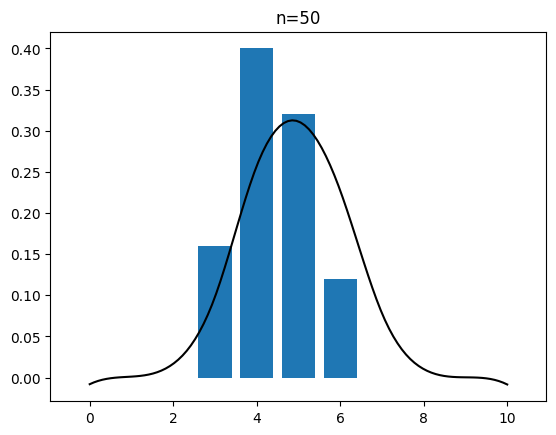

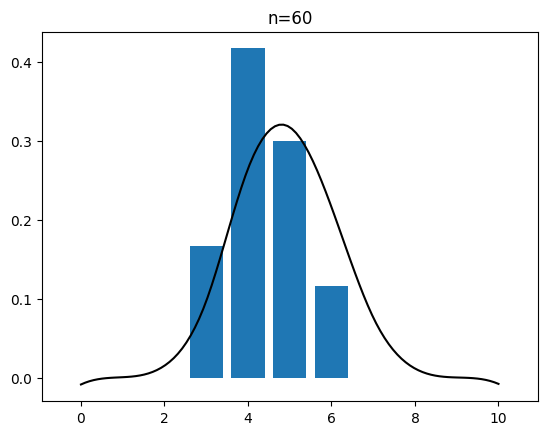

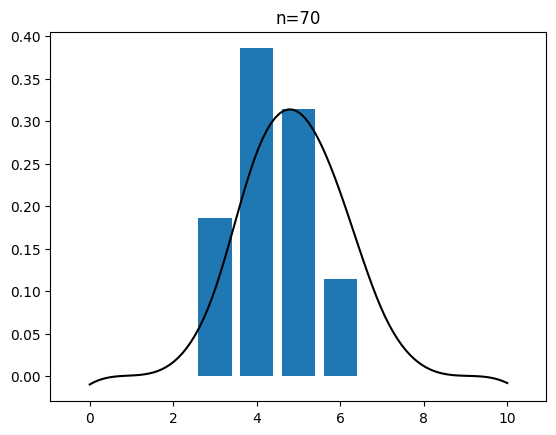

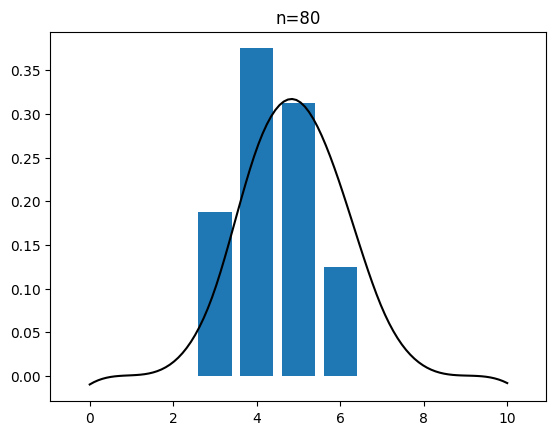

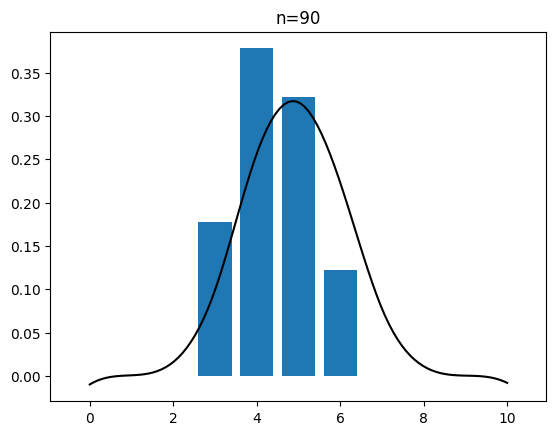

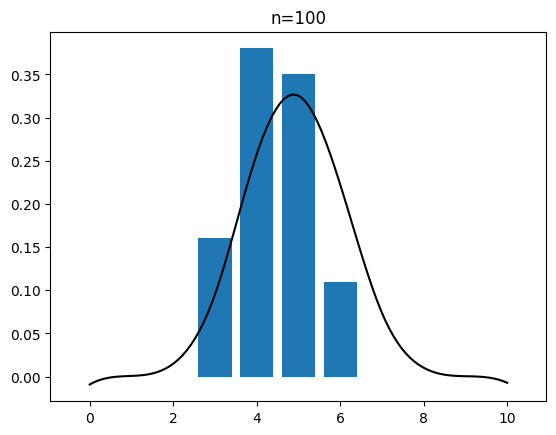

In [77]:
for _ in range(10):
    for _ in range(10):
        x = np.random.normal(5.0, 1.0, 1)
        if x < 0 or x >= 10:
            continue
        score_data(x)
    plot(coeffs, bins, n)
    time.sleep(1)